In [1]:
#import tool and information
import sys
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
data = pd.read_csv('./2330.TW.csv', encoding = 'big5')

In [2]:
from scipy.stats import norm

In [3]:
import math

In [4]:
#norm testing:cdf and inverse cdf of normal distribution
print (norm.cdf(1.96))
print (norm.ppf(0.975))

0.9750021048517795
1.959963984540054


In [5]:
#transfer my data into a matrix
data = data.to_numpy().tolist()

In [6]:
##date,open,high,low,close,adj close,volume
data

[['2015/7/23', 137.0, 137.5, 136.0, 136.0, 114.48523700000001, 36389000],
 ['2015/7/24', 138.0, 138.0, 136.0, 137.0, 115.32704199999999, 38194000],
 ['2015/7/27', 135.0, 135.5, 134.0, 134.0, 112.80161299999999, 43371000],
 ['2015/7/28', 135.0, 136.5, 134.0, 134.0, 112.80161299999999, 34219000],
 ['2015/7/29', 135.0, 136.0, 134.5, 135.5, 114.06430800000001, 29871000],
 ['2015/7/30', 136.0, 139.0, 136.0, 138.5, 116.58973700000001, 36097000],
 ['2015/7/31', 140.5, 140.5, 137.5, 139.5, 117.431549, 39992000],
 ['2015/8/3', 138.5, 138.5, 134.5, 134.5, 113.222527, 33631000],
 ['2015/8/4', 135.0, 136.5, 134.5, 136.5, 114.906136, 26546000],
 ['2015/8/5', 135.5, 135.5, 134.0, 134.0, 112.80161299999999, 28491000],
 ['2015/8/6', 136.0, 136.0, 132.0, 134.0, 112.80161299999999, 38414000],
 ['2015/8/7', 133.0, 133.5, 131.5, 133.0, 111.95981599999999, 30554000],
 ['2015/8/10', 131.0, 131.0, 125.5, 129.0, 108.592606, 63646000],
 ['2015/8/11', 133.5, 133.5, 130.5, 130.5, 109.85531599999999, 64344000],
 

In [7]:
#test
data[2][4]
data[3][4]

134.0

In [8]:
#i am confused:
#A=[[0,1,2],[3,4,5],[6,7,8]]
#A[1-1][3-1]=2

In [9]:
#get array: close price, ups and downs ratio within days
size = int (np.size(data)/7)
total_day = 1500
print ('size = %i' % size)
close = [0 for i in range(total_day)]
ratio = [0 for i in range(total_day)]
for i in range(0,size,1):
    close[i] = np.log(data[i][5])
for i in range(1,size-1,1):
    ratio[i] = close[i] - close[i-1]
mean = np.mean(ratio[1:size-1])
var = np.var(ratio[1:size-1])
std = np.sqrt(var)
print (close[0:5])
print (ratio[0:5])
print (max(close))
print (min(close))
print (max(ratio))
print (min(ratio))
print ('mean = %f' % mean)
print ('var = %f' % var)
print ('std = %f' % std)

size = 1219
[4.740445880183711, 4.747771935768808, 4.725630638607109, 4.725630638607109, 4.73676239461009]
[0, 0.0073260555850973574, -0.022141297161699214, 0.0, 0.011131756002980886]
5.950642552587727
0
0.08499326094522086
-0.0700180347500936
mean = 0.000992
var = 0.000226
std = 0.015018


In [10]:
#test 

simulate = [[0]*2 for i in range(3)]
print (simulate)

[[0, 0], [0, 0], [0, 0]]


In [11]:
#making Markov matrix
#category 0:<-10% 1:-9%~-10% 100: -1%~0% 20:+9%~+10% 21:>10%
ratio_divided = [0 for i in range(10)]
#mean + norm.ppf(0.9)
big_matrix = [[0]*10 for i in range(10)]
for i in range(1,size-2,1):
    for j in range(1,11,1):
        if (ratio[i] < mean + norm.ppf(j/10)*std):
            a = j-1
            break
    for k in range(1,11,1):
        if (ratio[i+1] < mean + norm.ppf(k/10)*std):
            b = k-1
            break
    big_matrix[a][b] += 1
#ratio = -0.0175 => -1.75% => category 8
print (np.sum(big_matrix))
print (big_matrix)
test = 0
for i in range(0,10,1):
    ##test = 0
    for j in range(0,10,1):
        test += big_matrix[i][j]*j
    ##print(test/sum(big_matrix[i]))
print(test)
##error = test / np.sum(big_matrix) - 4.5

1216
[[14, 8, 6, 7, 11, 10, 13, 10, 11, 11], [7, 11, 9, 9, 9, 12, 10, 7, 14, 14], [8, 14, 11, 9, 25, 19, 9, 12, 14, 9], [9, 7, 11, 4, 19, 13, 15, 11, 5, 9], [10, 17, 23, 14, 28, 23, 17, 15, 12, 16], [9, 7, 20, 17, 16, 20, 20, 12, 17, 10], [10, 16, 12, 15, 25, 12, 16, 11, 17, 7], [16, 9, 11, 14, 9, 15, 9, 14, 8, 5], [9, 7, 11, 10, 22, 9, 16, 9, 6, 10], [9, 6, 16, 4, 11, 15, 15, 9, 5, 7]]
5475


In [12]:
#simulating

for i in range(size,total_day,1):
    for j in range(1,11,1):
        if (ratio[i-1] < mean + norm.ppf(j/10)*std):
            a = j-1
            break
    rd = np.random.uniform(0,sum(big_matrix[a]))
    for k in range(0,10,1):
        if (rd > 0):
            rd -= big_matrix[a][k]
        if (rd <= 0):
            cat = k
            break
    rd_std = np.random.uniform(cat/10,cat/10 + 0.1)
    rd_ratio = mean + norm.ppf(rd_std)*std - 0.5 * var
    ratio[i] = rd_ratio
    close[i] = close[i-1] + ratio[i]


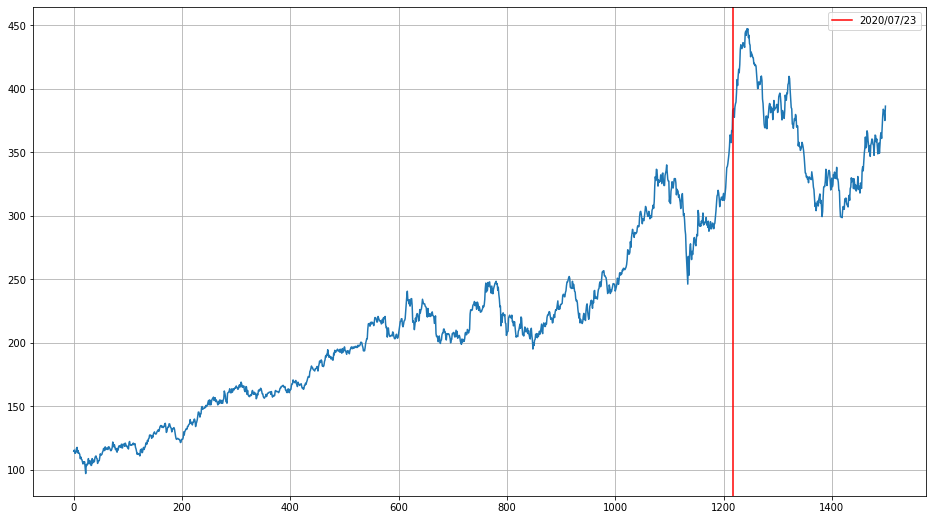

In [13]:
# plot
plt.figure(figsize=(16, 9))
x_range = np.arange(size, total_day, 1)
plt.plot(np.exp(close))
plt.axvline(x=size-1,color='r',label='2020/07/23')
plt.gca().legend()
plt.grid()
plt.show()

In [14]:
# creating many fake database
simulation_time = 1000
simulate = [[0]*total_day for i in range(simulation_time)]

for s in range(0,simulation_time,1):
    for t in range(0,size,1):
        simulate[s][t] = close[t]
    for i in range(size,total_day,1):
        for j in range(1,11,1):
            if (ratio[i-1] < mean + norm.ppf(j/10)*std):
                a = j-1
                break
        rd = np.random.uniform(0,sum(big_matrix[a]))
        for k in range(0,10,1):
            if (rd > 0):
                rd -= big_matrix[a][k]
            if (rd <= 0):
                cat = k
                break
        rd_std = np.random.uniform(cat/10,cat/10 + 0.1)
        rd_ratio = mean + norm.ppf(rd_std)*std - 0.5 * var
        ratio[i] = rd_ratio
        simulate[s][i] = simulate[s][i-1] + ratio[i]
        


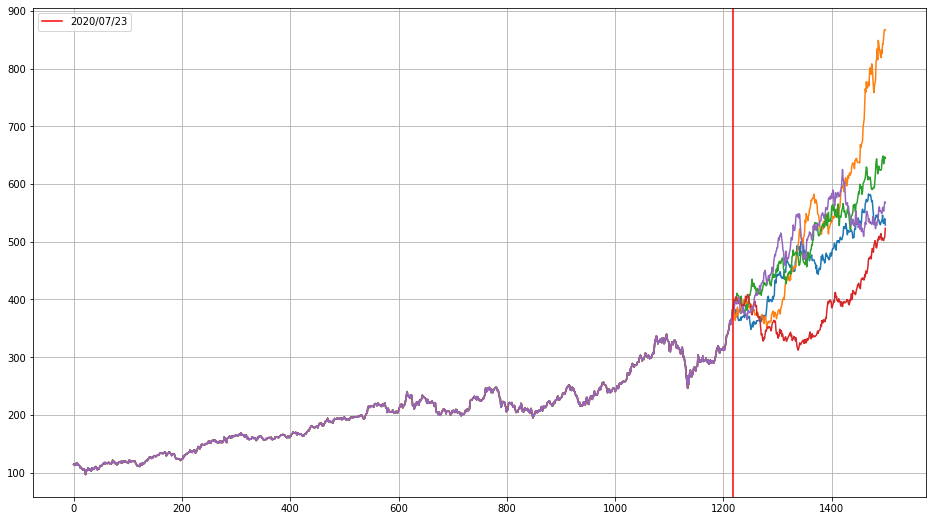

In [15]:
# plot testing
plt.figure(figsize=(16, 9))
x_range = np.arange(0, total_day, 1)
for i in range(0,5,1):
    plt.plot(np.exp(simulate[i]))
plt.axvline(x=size-1,color='r',label='2020/07/23')
plt.gca().legend()
plt.grid()
plt.show()

In [16]:
pr_20 = [0 for i in range(total_day)]
pr_40 = [0 for i in range(total_day)]
pr_50 = [0 for i in range(total_day)]
pr_60 = [0 for i in range(total_day)]
pr_80 = [0 for i in range(total_day)]
avg = [0 for i in range(total_day)]
for i in range(0,size,1):
    pr_20[i] = close[i]
    pr_40[i] = close[i]
    pr_50[i] = close[i]
    pr_60[i] = close[i]
    pr_80[i] = close[i]
    avg[i] = close[i]
for i in range(size,total_day,1):
    day = [0 for i in range(simulation_time)]
    for j in range(0,simulation_time,1):
        day[j] = simulate[j][i]
        ##day.sort()
        sorted_day = sorted(day)
    pr_20[i] = sorted_day[int (simulation_time * 0.2)]
    pr_40[i] = sorted_day[int (simulation_time * 0.4)]
    pr_50[i] = sorted_day[int (simulation_time * 0.5)]
    pr_60[i] = sorted_day[int (simulation_time * 0.6)]
    pr_80[i] = sorted_day[int (simulation_time * 0.8)]
    avg[i] = sum(sorted_day)/simulation_time

In [17]:
print(np.exp(pr_40[size-1+41]))
print(np.exp(pr_50[size-1+41]))
print(np.exp(pr_60[size-1+41]))
print(np.exp(pr_80[size-1+41]))

389.3110048480028
398.31676565943224
407.47353606395535
427.1414716522053


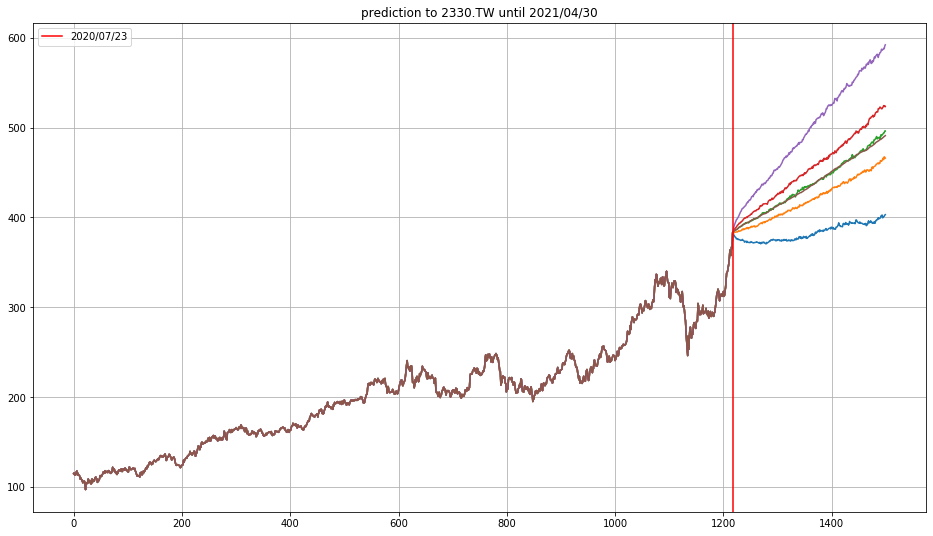

In [18]:
# another plot testing
plt.figure(figsize=(16, 9))
x_range = np.arange(0, total_day, 1)

plt.plot(np.exp(pr_20))
plt.plot(np.exp(pr_40))
plt.plot(np.exp(pr_50))
plt.plot(np.exp(pr_60))
plt.plot(np.exp(pr_80))
plt.plot(np.exp(avg))
plt.title(r'data simulating until 2021/04/30')
plt.axvline(x=size-1,color='r',label='2020/07/23')
plt.gca().legend()
plt.grid()
plt.show()

The goal is to optimize a random strategy. 

First try some simple two variable strategy to make sure it is working.

set a random inverse of elasticity of substitution(0.00092).



Use a random utility function $E(r)-0.01Var(r)$ where r is return ratio.

(The initial value:x,y)

In [19]:
#y=sell price
x = np.log(450)
y = np.log(230)
r = [0 for i in range(simulation_time)]
for i in range(0,simulation_time,1):
    for j in range(size,total_day,1):
        z = simulate[i][total_day-1]
        day = total_day
        if (simulate[i][j] > x or simulate[i][j] < y):
            z = simulate[i][j]
            day = j+1
            break
    r[i] = (z-0.00092*(day-size))-close[size-1]
E_r = np.mean(r)
Var_r = np.var(r)
utility = E_r - 0.01 * Var_r
print(E_r)
print(Var_r)
print(utility)

-0.008755717874981165
0.028163617417974643
-0.009037354049160912


getting the initial utility on first strategy.

In [20]:
#y=sell price
r = [0 for i in range(simulation_time)]
for i in range(0,simulation_time,1):
    z = simulate[i][total_day-1]
    r[i] = (z-0.00092*(total_day-size))-close[size-1]
E_r = np.mean(r)
Var_r = np.var(r)
utility = E_r - 0.01 * Var_r
print(E_r)
print(Var_r)
print(utility)

-0.01274293544219542
0.05297677016064263
-0.013272703143801846


making a control group(strategy: do nothing)

In [21]:
def calculating_utility(x,y):
    r = [0 for i in range(simulation_time)]
    for i in range(0,simulation_time,1):
        for j in range(size,total_day,1):
            z = simulate[i][total_day-1]
            day = total_day
            if (simulate[i][j] > x or simulate[i][j] < y):
                z = simulate[i][j]
                day = j+1
                break
        r[i] = (z-0.00092*(day-size))-close[size-1]
    E_r = np.mean(r)
    Var_r = np.var(r)
    utility = E_r - 0.01 * Var_r
    return utility

In [22]:
learning_times = 100
growth_track = [0 for i in range(learning_times)]
x_track = [0 for i in range(learning_times)]
y_track = [0 for i in range(learning_times)]
x = 450
y = 230
x_track[0] = x
y_track[0] = y
growth_track[0] = calculating_utility(np.log(x),np.log(y))
for k in range(0,learning_times,1):
    alpha = calculating_utility(np.log(x+1),np.log(y))-calculating_utility(np.log(x),np.log(y))
    beta = calculating_utility(np.log(x),np.log(y+1))-calculating_utility(np.log(x),np.log(y))
    x += 10 * alpha
    y += 10 * beta

    x_track[k] = x
    y_track[k] = y
    growth_track[k] = calculating_utility(np.log(x),np.log(y))
print(x,y,calculating_utility(np.log(x),np.log(y)))

450.0153806687024 230.0 -0.009017950686409931


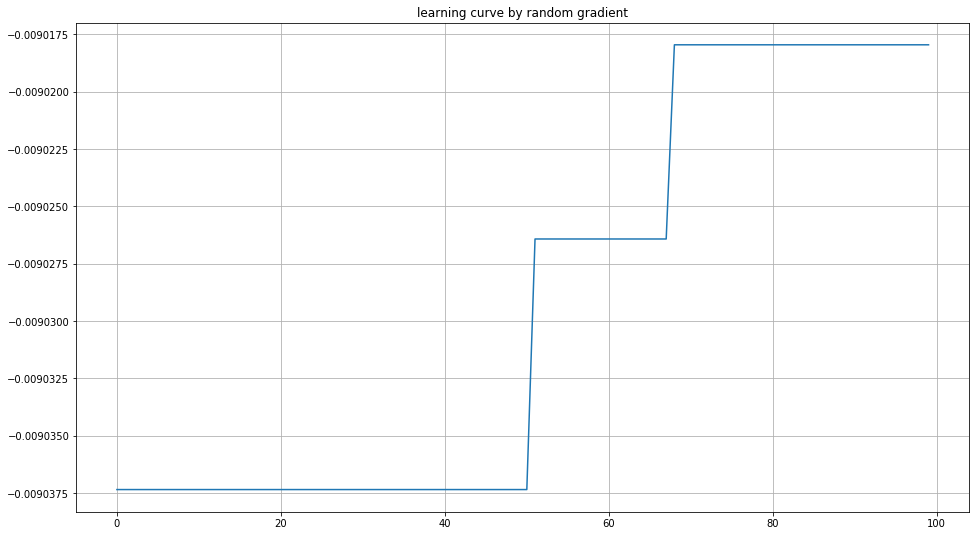

In [23]:
# plot
plt.figure(figsize=(16, 9))
x_range = np.arange(0, learning_times, 1)

plt.plot(growth_track)

plt.title(r'learning curve by random gradient')

plt.grid()
plt.show()

In [69]:
learning_times = 200
growth_track = [0 for i in range(learning_times)]
x_track = [0 for i in range(learning_times)]
y_track = [0 for i in range(learning_times)]
x = 450
y = 230
x_track[0] = x
y_track[0] = y
growth_track[0] = calculating_utility(np.log(x),np.log(y))
for k in range(1,learning_times,1):
    random_dice = np.random.uniform(0,5*(np.power(1/k,1/3)))
    random_pirate = np.random.uniform(0,2*np.pi)
    random_x = random_dice * np.cos(random_pirate)
    random_y = random_dice * np.sin(random_pirate)
    growth = calculating_utility(np.log(x+random_x),np.log(y+random_y))-calculating_utility(np.log(x),np.log(y))
    
    x += 1000 * growth * random_x
    y += 1000 * growth * random_y
    
    x_track[k] = x
    y_track[k] = y
    growth_track[k] = calculating_utility(np.log(x),np.log(y))
print(x,y,calculating_utility(np.log(x),np.log(y)))

442.376100731463 234.0027471348396 -0.007466869718097806


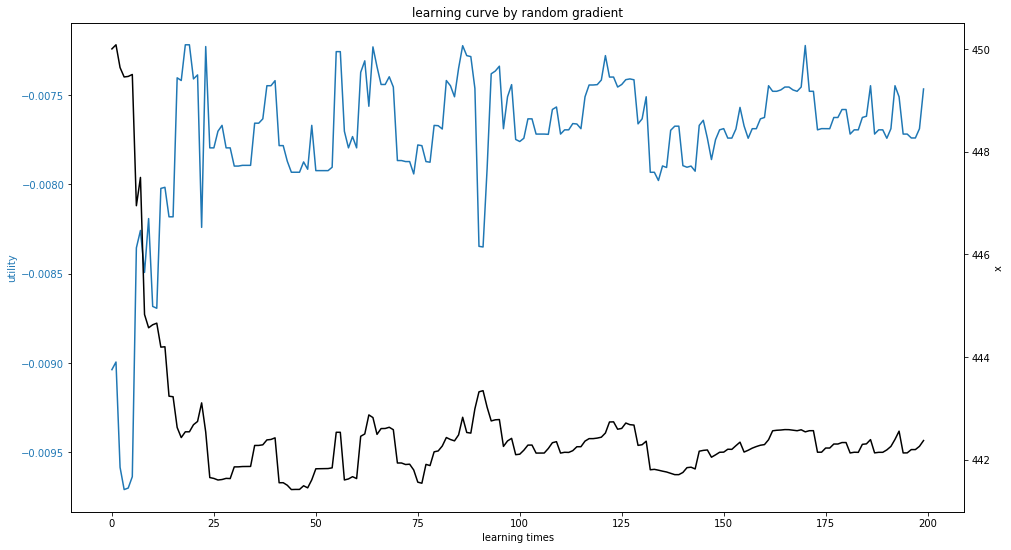

In [70]:
# plot

x_range = np.arange(0, learning_times, 1)
fig, ax1 = plt.subplots(figsize=(16, 9))
plt.title(r'learning curve by random gradient')
plt.xlabel('learning times')


ax2 = ax1.twinx()
ax1.set_ylabel('utility', color='tab:blue')
ax1.plot(growth_track, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')


ax2.set_ylabel('x', color='black')
ax2.plot(x_track, color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.show()

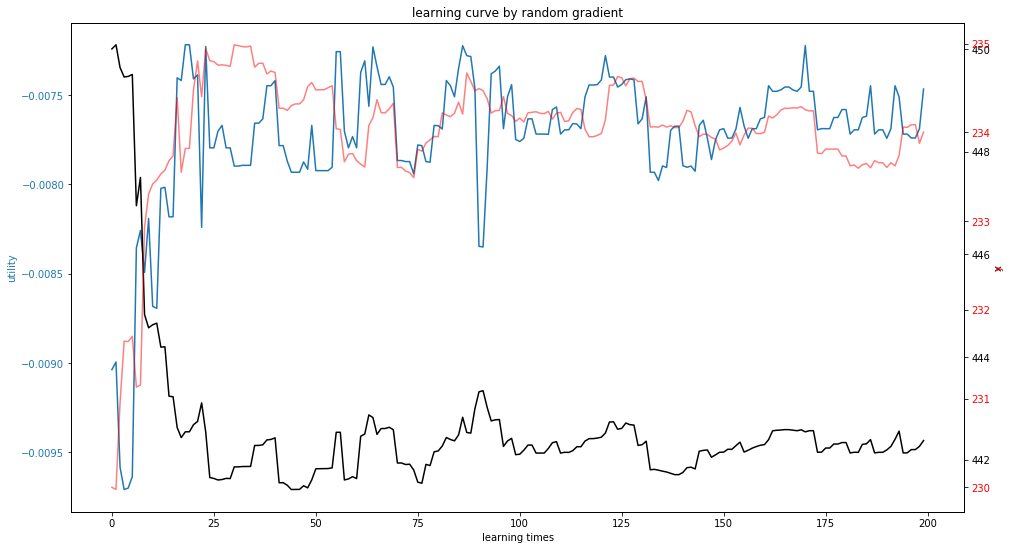

In [71]:
# plot

x_range = np.arange(0, learning_times, 1)
fig, ax1 = plt.subplots(figsize=(16, 9))
plt.title(r'learning curve by random gradient')
plt.xlabel('learning times')


ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax1.set_ylabel('utility', color='tab:blue')
ax1.plot(growth_track, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')


ax2.set_ylabel('x', color='black')
ax2.plot(x_track, color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax3.set_ylabel('y', color='red')
ax3.plot(y_track, color='red', alpha = 0.5)
ax3.tick_params(axis='y', labelcolor='red')


plt.show()

In [26]:
max_utility = -1
for x in range(440,460,1):
    for y in range(210,250,1):
        if (max_utility < calculating_utility(np.log(x),np.log(y))):
            max_utility = calculating_utility(np.log(x),np.log(y))
            final_x = x
            final_y = y
    
print(final_x,final_y,max_utility)

443 241 -0.007407420283994563
